In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt

def scegli_entrata(array):
    indice_scelto = np.random.choice(len(array))
    entrata_scelta = array[indice_scelto]
    return indice_scelto, entrata_scelta

#9 è la macchina, i 3 indicano le capre
doors=[3,3,9]           
cons_win=[]  
swi_win=[]
new_win=[]

N=5000
#simulo N partite
for i in range(N):
    #scelta del conservatore
    indice, choice = scegli_entrata(doors) 
    if choice==9:
        cons_win=np.append(cons_win, choice)
    #print("indice conservatore" ,indice, "e valore conserv", choice)
    
    #scelta del presentatore 
    indice_presen, choice_presen= scegli_entrata(doors) 
    
    #finchè presen sceglie porta del conserv oppure quella con la macchina continuo a generare la scelta
    while indice_presen==indice or choice_presen==9:    
        indice_presen, choice_presen= scegli_entrata(doors)
    #print ("indice presen" ,indice_presen, "e valore presen",choice_presen )        

    indice_swi, choice_swi=scegli_entrata(doors)
    #switcher deve scegliere l'ultima porta rimasta
    while indice_swi==indice_presen or indice_swi==indice:
        indice_swi, choice_swi=scegli_entrata(doors)
       
    if choice_swi==9:
        swi_win=np.append(swi_win, choice_swi)
    #print ("indice switcher" ,indice_swi, "e valore switcher", choice_swi) 
    
    indice_new, choice_new=scegli_entrata(doors)
    while indice_new==indice_presen:
        indice_new, choice_new=scegli_entrata(doors)
    
    if choice_new==9:
        new_win=np.append(new_win, choice_new)
    #print ("indice new" ,indice_new, "e valore new", choice_new)        

print("numero vittore cons", len(cons_win),"numero vittore swi", len(swi_win),"numero vittore new", len(new_win) )
print("probabilità che vinca il conservatore:", len(cons_win)/N)
print("probabilità che vinca il switcher:", len(swi_win)/N)
print("probabilità che vinca il newcomer:", len(new_win)/N)

numero vittore cons 1691 numero vittore swi 3309 numero vittore new 2515
probabilità che vinca il conservatore: 0.3382
probabilità che vinca il switcher: 0.6618
probabilità che vinca il newcomer: 0.503


In [2]:
#caso 100 porte

doors=np.zeros(99)
doors=np.append(doors, 1)

cons_win=[]
swi_win=[]
new_win=[]

for i in range(5000):
    #scelta conservatore
    indice, choice= scegli_entrata(doors) 
    if choice==1:
            cons_win=np.append(cons_win, choice)
    doors[indice]=2    
    
    #porte scelte dal presentatore le elimino
    while len(doors)>2:
        indice_presen, choice_presen= scegli_entrata(doors)
        while choice_presen==2 or choice_presen==1:  
            indice_presen, choice_presen= scegli_entrata(doors)
        doors=np.delete(doors, indice_presen)
    #print(doors)
    indice_swi, choice_swi=scegli_entrata(doors)
    while choice_swi==2:
        indice_swi, choice_swi=scegli_entrata(doors)
    if choice_swi==1:
        swi_win=np.append(swi_win, choice_swi)
    
    doors=np.zeros(99)
    doors=np.append(doors, 1)
    
print("probabilità che vinca il conservatore:", len(cons_win)/5000)
print("probabilità che vinca il switcher:", len(swi_win)/5000)

probabilità che vinca il conservatore: 0.0084
probabilità che vinca il switcher: 0.9916


In [42]:
#N porte e il conduttore ne sceglie M<=N-2 

#num di porte
N=50
#num di porte che conservatore apre
M=np.arange(2, 49, 2) 

doors=np.zeros(N-1)
doors=np.append(doors, 1)

cons_win=[]
swi_win=[]
new_win=[]
prob_swi=[]

for mm in (M):
    cons_win=[]
    swi_win=[]
    for i in range(1000):
    
        #scelta conservatore
        indice, choice= scegli_entrata(doors) 
        if choice==1:
                cons_win=np.append(cons_win, choice)
        doors[indice]=2    

        #porte scelte dal presentatore le elimino
        while len(doors)>(N-mm):
            indice_presen, choice_presen= scegli_entrata(doors)
            while choice_presen==2 or choice_presen==1:  
                indice_presen, choice_presen= scegli_entrata(doors)
            doors=np.delete(doors, indice_presen)
        #print(doors)
        indice_swi, choice_swi=scegli_entrata(doors)
        while choice_swi==2:
            indice_swi, choice_swi=scegli_entrata(doors)
        if choice_swi==1:
            swi_win=np.append(swi_win, choice_swi)
        doors=np.zeros(N-1)
        doors=np.append(doors, 1)
    prob_swi=np.append(prob_swi, len(swi_win)/1000)

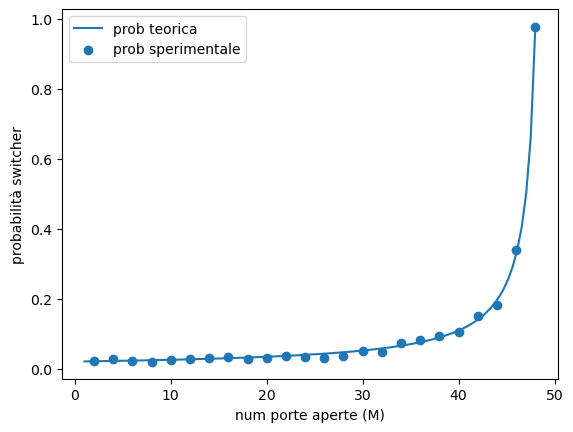

In [44]:
m=np.linspace(1, 48, 100)
plt.plot(m,(N-1)/(N*(N-1-m)), label="prob teorica")
plt.scatter(M, prob_swi, label="prob sperimentale")
plt.legend()
plt.xlabel("num porte aperte (M)")
plt.ylabel("probabilità switcher")
plt.show()